# Временные ряды

- Временные ряды — это последовательности данных, отсортированные по времени, которые могут использоваться для прогнозирования, анализа или выявления закономерностей в изменении величин с течением времени.

- Это особенно важно в таких областях, как финансы, экономика, прогнозирование погоды, здравоохранение, производство и многих других.

### Основные особенности временных рядов:

- Зависимость от времени: Данные в временном ряду зависят от времени. Текущие значения часто связаны с предыдущими.

- Не стационарность: Временные ряды могут быть нестабильными, что означает, что статистические свойства (среднее или дисперсия) могут изменяться со временем.

- Тренды, сезонность и циклы: Временные ряды могут включать тренды (долгосрочные изменения), сезонные колебания (повторяющиеся за фиксированные интервалы времени) и циклы (нефиксированные по времени изменения).

In [13]:
import pandas as pd

df = pd.read_csv('ETTh1.csv')

In [14]:
df

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
17416,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
17417,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
17418,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000


In [15]:
x = df.OT

In [16]:
x

0        30.531000
1        27.787001
2        27.787001
3        25.044001
4        21.948000
           ...    
17415    10.904000
17416    11.044000
17417    10.271000
17418     9.778000
17419     9.567000
Name: OT, Length: 17420, dtype: float64

In [17]:
import matplotlib.pyplot as plt

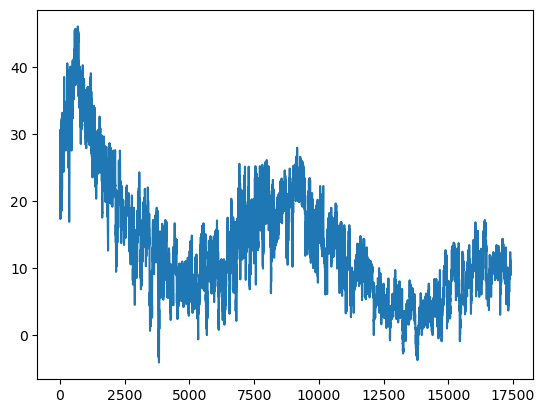

In [18]:
# Визуализация
plt.plot(x)

In [19]:
# Описание, оценка параметров

parts = int(len(x)/2)
 
# splitting the data into three parts
part_1, part_2 = x[0:parts], x[parts:]
 
# calculating the mean of the separated three 
# parts of data individually.
mean_1, mean_2 = part_1.mean(), part_2.mean()
 
# calculating the variance of the separated 
# three parts of data individually.
var_1, var_2 = part_1.var(), part_2.var()

In [20]:
print(mean_1, mean_2)

17.156005978553495 9.493337201209895


In [21]:
print(var_1, var_2)

83.65108815928707 33.78086006369356


In [22]:
print(x.mean(), x.var())

13.324671589881694 73.39256921636989


In [23]:
# Сезонность
import statsmodels.api as sm

In [24]:
# Указывает тип модели, используемой для декомпозиции. 
# В данном случае выбрана аддитивная модель. Это значит, что модель предполагает, 
# что временной ряд можно представить как сумму тренда, сезонности и остатков:
result = sm.tsa.seasonal_decompose(df.OT, model='additive', period=5000)

# период сезонных колебаний
# если данные собираются ежедневно, 
# и мы ожидаем сезонные изменения раз в год, то period будет равно 365


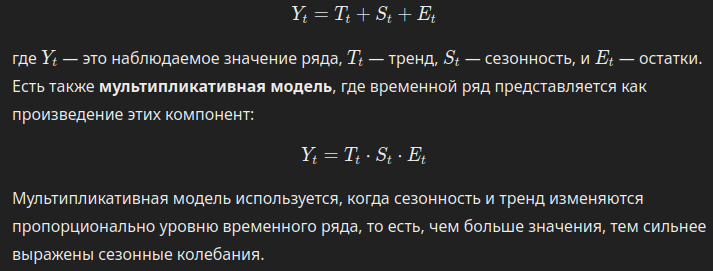

### Результат выполнения функции: 

- result.trend - трендовые
- result.seasonal - сезонные
- result.resid - остаточные
- result.observed - orig

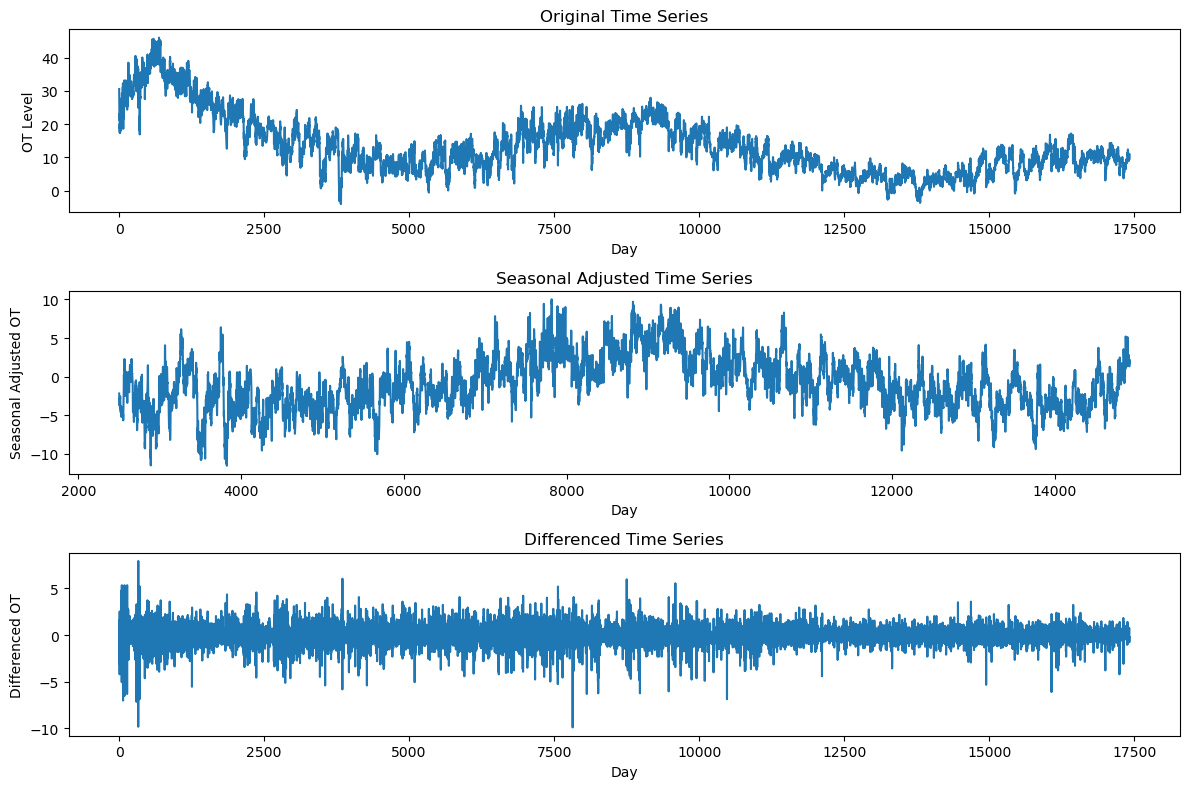

In [25]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(df.OT)
plt.title('Original Time Series')
plt.xlabel('Day')
plt.ylabel('OT Level')

# Seasonal Adjusted
plt.subplot(3, 1, 2)
plt.plot(result.resid)
plt.title('Seasonal Adjusted Time Series')
plt.xlabel('Day')
plt.ylabel('Seasonal Adjusted OT')

# Differenced
plt.subplot(3, 1, 3)
plt.plot(df.OT.diff())
plt.title('Differenced Time Series')
plt.xlabel('Day')
plt.ylabel('Differenced OT')

plt.tight_layout()
plt.show()

In [26]:
# скользящее среднее, MA

MA_OT = df.OT.rolling(1000).mean()

<Axes: >

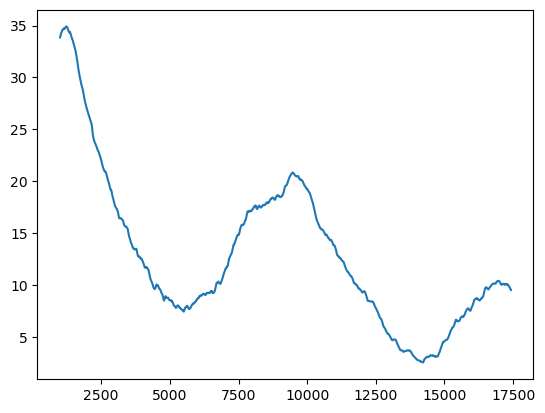

In [27]:
MA_OT.plot()

In [28]:
x_train = x[:100]
x_test = x[100:200]

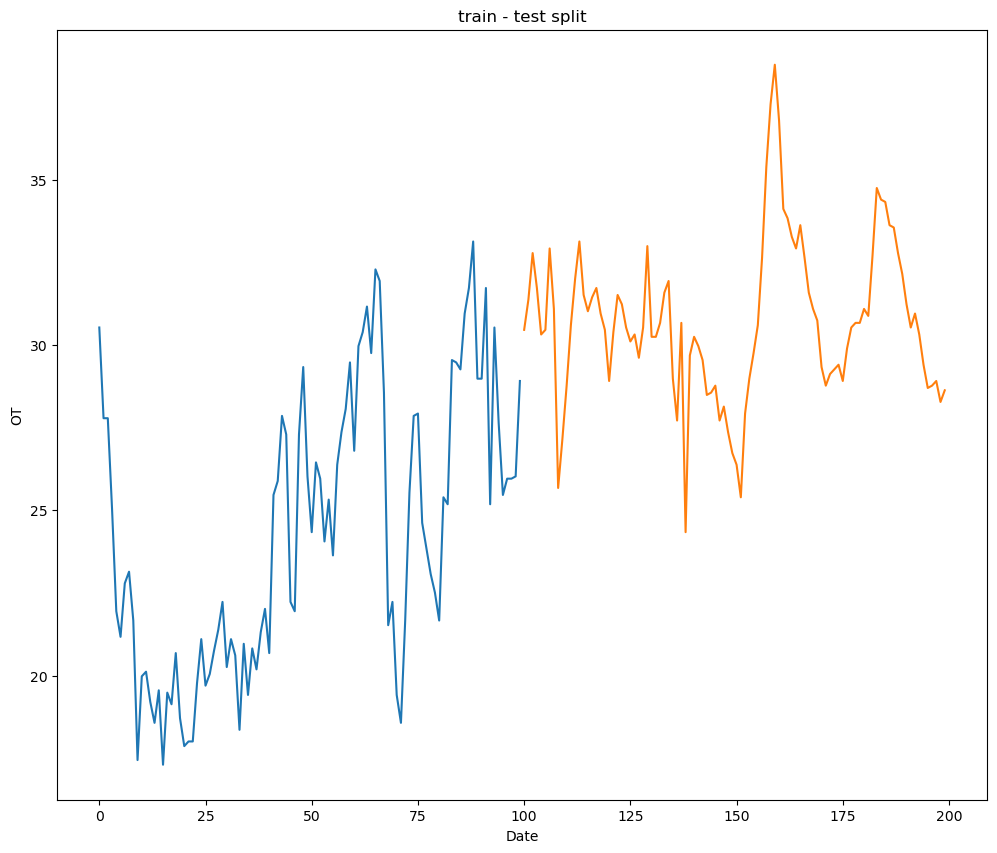

In [29]:
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
x_train.plot(ax=ax, figsize=(12,10))
x_test.plot(ax=ax)
plt.title('train - test split')
plt.xlabel('Date')
plt.ylabel('OT')
plt.show()

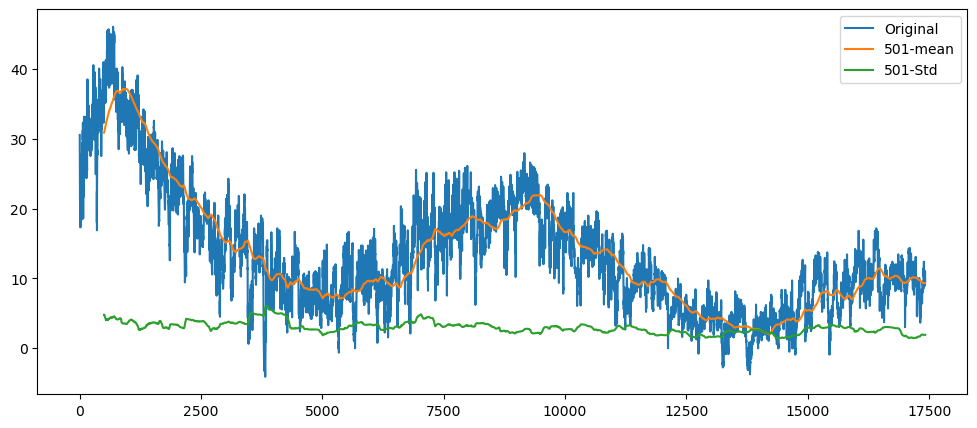

In [30]:
x = df.OT.plot(figsize=(12,5), legend= True, label='Original')
df.OT.rolling(window=501).mean().plot(legend= True, label='501-mean')
df.OT.rolling(window=501).std().plot(legend= True, label='501-Std')

ax.autoscale(axis='x',tight=True) # fit to x-axis
ylabel='OT'
xlabel = 'x'
ax.set(xlabel=xlabel, ylabel=ylabel) #name axis
plt.show()

In [31]:
# "Экспоненциальное сглаживание", предсказание

#### Экспоненциальное сглаживание — это метод временных рядов, который используется для прогнозирования, при котором более свежие данные получают больший вес, чем старые. Это позволяет модели быстрее реагировать на изменения в данных.

In [32]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

exp_model = ExponentialSmoothing(x_train, trend='add', seasonal='add', seasonal_periods=21).fit()

In [33]:
test_predictions = exp_model.forecast(len(x_test))

<Axes: >

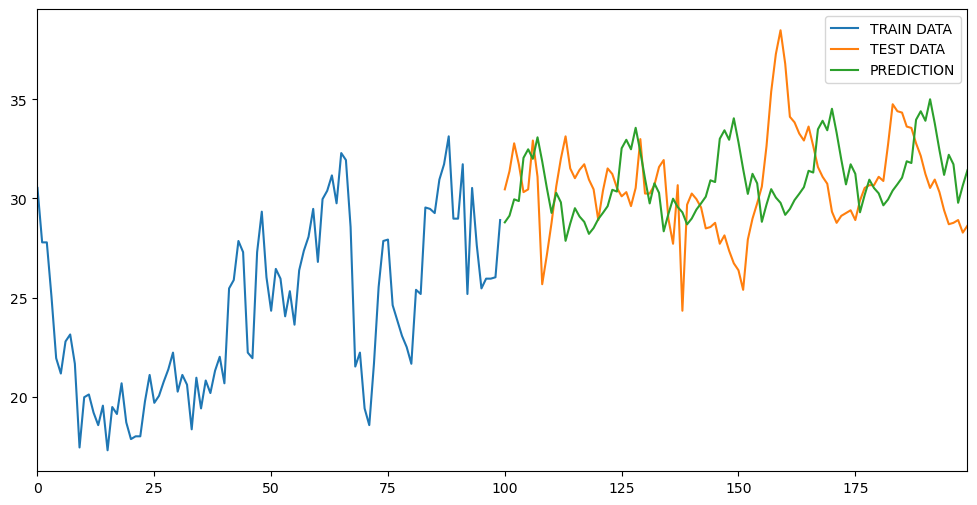

In [34]:
x_train.plot(legend=True, label='TRAIN DATA')
x_test.plot(legend=True, label='TEST DATA', figsize=(12, 6)).autoscale(axis='x', tight=True)
test_predictions.plot(legend=True, label='PREDICTION')

In [52]:
# Авторегрессия
from statsmodels.tsa.ar_model import AutoReg

# модель авторегрессии первого порядка, то есть модель, которая использует 
# только одно предыдущее значение временного ряда для прогнозирования текущего.
mod1 = AutoReg(x_train, 1, old_names=False)
res1 = mod1.fit()
print(res1.summary())

# Логарифм правдоподобия модели. Чем выше это значение, тем лучше модель подстраивает данные.
# Метод оценки параметров — условный метод максимального правдоподобия (MLE).
# S.D. of innovations: 1.710: Стандартное отклонение остатков (инноваций). Это мера разброса ошибок модели.

# AIC, BIC, HQIC: Критерии информации Акаике (AIC), Байеса (BIC) и Ханке-Квандта (HQIC) используются для оценки качества модели. 
# Меньшие значения этих критериев говорят о лучшем качестве модели.


                            AutoReg Model Results                             
Dep. Variable:                     OT   No. Observations:                   10
Model:                     AutoReg(1)   Log Likelihood                 -17.597
Method:               Conditional MLE   S.D. of innovations              1.710
Date:                Mon, 10 Mar 2025   AIC                             41.194
Time:                        10:51:22   BIC                             41.786
Sample:                             1   HQIC                            39.918
                                   10                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8113      4.518      0.622      0.534      -6.044      11.667
OT.L1          0.8270      0.182      4.549      0.000       0.471       1.183
                                    Roots           

In [37]:
# предсказание
start=len(x_train)
end=len(x_train)+len(x_test)-1
predictions1 = res1.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [38]:
predictions1

100    28.172896
101    27.548366
102    27.021362
103    26.576655
104    26.201393
         ...    
195    24.173584
196    24.173584
197    24.173584
198    24.173584
199    24.173584
Name: AR(1) Predictions, Length: 100, dtype: float64

<Axes: >

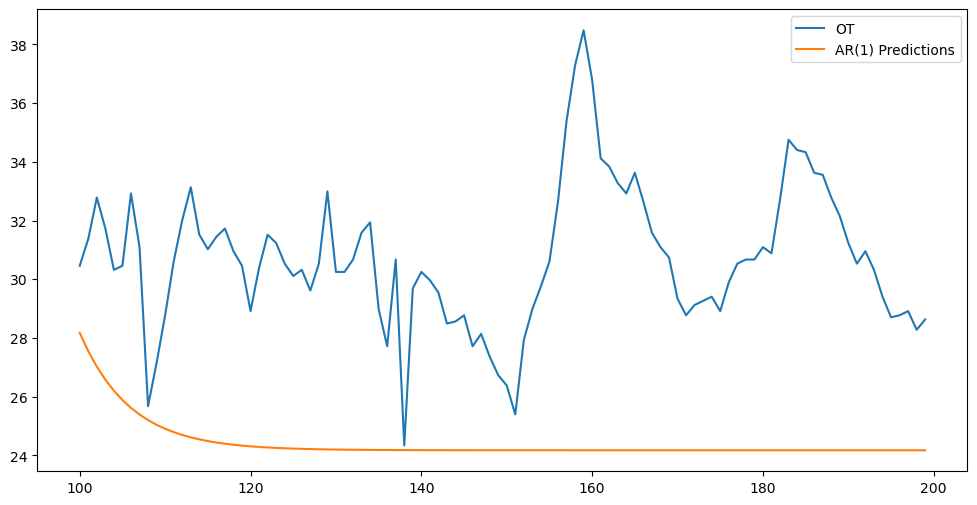

In [39]:
x_test.plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6))

In [40]:
# AR_501 predictions
mod5 = AutoReg(x_train, 5)
res5 = mod5.fit()
print(res5.summary())

                            AutoReg Model Results                             
Dep. Variable:                     OT   No. Observations:                  100
Model:                     AutoReg(5)   Log Likelihood                -209.881
Method:               Conditional MLE   S.D. of innovations              2.204
Date:                Mon, 10 Mar 2025   AIC                            433.761
Time:                        10:44:47   BIC                            451.638
Sample:                             5   HQIC                           440.985
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0366      1.493      2.034      0.042       0.111       5.962
OT.L1          0.7873      0.102      7.690      0.000       0.587       0.988
OT.L2          0.0718      0.131      0.550      0.5

In [41]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
predictions5 = res5.predict(start=start, end=end, dynamic=False).rename('AR(5) Predictions')

<Axes: >

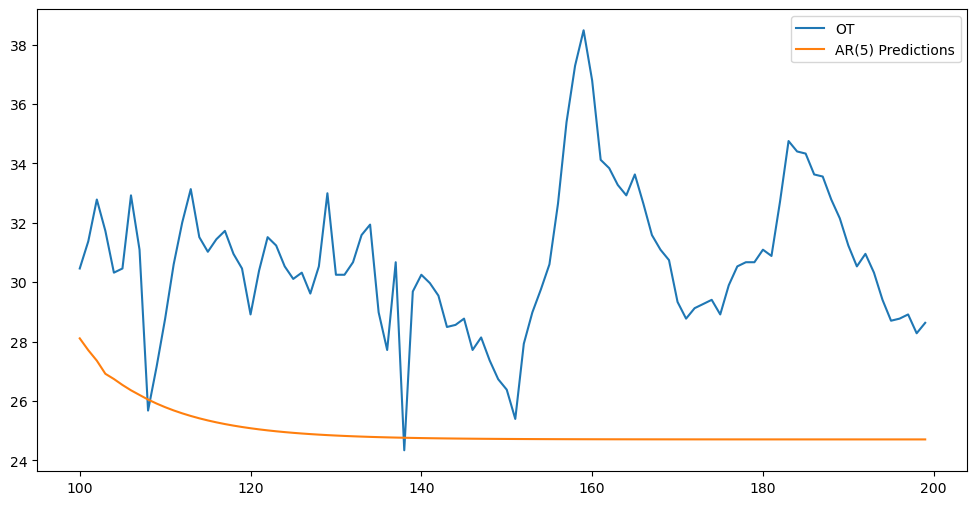

In [42]:
x_test.plot(legend=True)
predictions5.plot(legend=True,figsize=(12,6))

In [43]:
# предсказания будущих значений
start = len(x_train)
end = len(x_train)+10

pred_future = res5.predict(start=start, end=end, dynamic=False)

<Axes: >

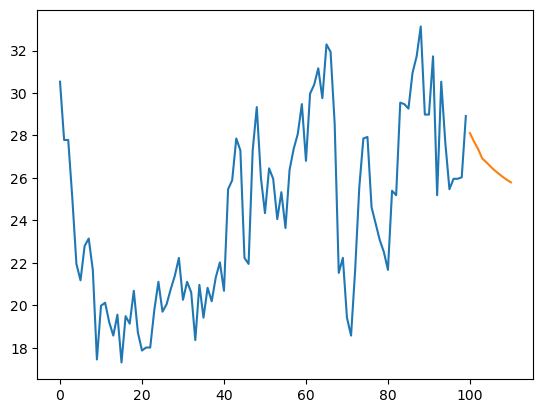

In [44]:
x_train.plot()
pred_future.plot()

In [45]:
x_train = df.OT[:10]
x_test = df.OT[10:20]

<Axes: >

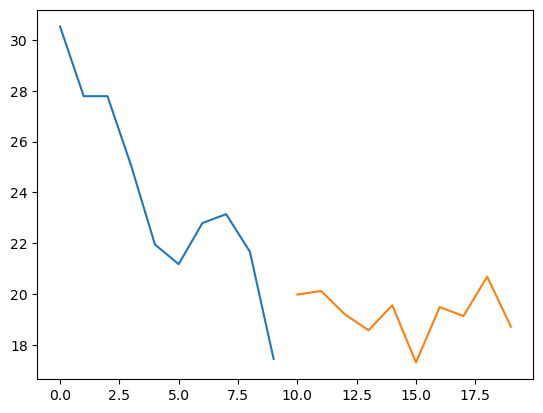

In [46]:
x_train.plot()
x_test.plot()

In [47]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(x_train,order=(3,0,0)).fit()

In [48]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
predictions = model.predict(start=start, end=end).rename('ARMA(1,0,0) Predictions')

[Text(0.5, 0, 'x'), Text(0, 0.5, 'OT')]

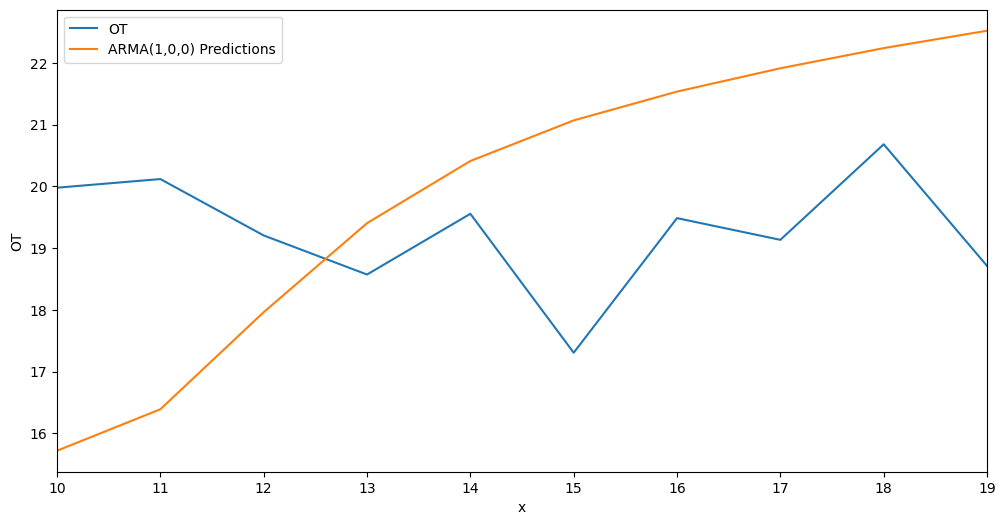

In [49]:
title = ''
ylabel='OT'
xlabel='x' # we don't really need a label here

ax = x_test.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [50]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(x_test, predictions)
print(f'ARIMA(1,0,0) MSE Error: {error:11.10}')

ARIMA(1,0,0) MSE Error: 7.809707941


In [51]:
# Задание (файл 2)
# Разделить данные на N групп. (возможно, выбрать первые M данных для обучения)

# Выполнить итеративное предсказание, данные для каждого следующего предсказания обновлять по методу
# "экспоненциальное среднее".

In [56]:
df = pd.read_csv('ETTm1.csv')
x = df.OT

print(len(x))
x

69680


0        30.531000
1        30.459999
2        30.038000
3        27.013000
4        27.787001
           ...    
69675     9.567000
69676     9.567000
69677     9.426000
69678     9.426000
69679     9.778000
Name: OT, Length: 69680, dtype: float64

In [73]:
# Разделение данных на группы
N = 6
M = 500
groups = [x[i * M:(i + 1) * M] for i in range(N)]

x_train = groups[0]
x_test = groups[1]

print(len(groups[0]))

500


In [82]:
# Реализовать предсказание ARIMA для 2 (тренировочной группы) на основе 1. Рассчитать MSE.
# Исследовать качество работы модели в зависимости от параметров (для групп 1-2).

orders = [
    (1, 0, 0), 
    (2, 0, 0),
    (3, 0, 0), 
    (4, 0, 0),
    (5, 0, 0), 
    (7, 0, 0),
    (10, 0, 0),
    (15, 0, 0), 
    (20, 0, 0), 
    (30, 0, 0),
    (40, 0, 0),
    (50, 0, 0),  
    (70, 0, 0)]

results = {}

for order in orders:
    model = ARIMA(x_train, order=order).fit()

    start = len(x_train)
    end = start + len(x_test) - 1
    predictions = model.predict(start=start, end=end)

    mse = mean_squared_error(x_test, predictions)
    results[order] = mse
    print(f'MSE  {order}: {mse:.5f}')

    

# 21.5 min



MSE  (1, 0, 0): 19.61295
MSE  (2, 0, 0): 21.96071
MSE  (3, 0, 0): 21.98826
MSE  (4, 0, 0): 21.82469
MSE  (5, 0, 0): 21.95226
MSE  (7, 0, 0): 21.14789
MSE  (10, 0, 0): 20.76578
MSE  (15, 0, 0): 20.38125
MSE  (20, 0, 0): 20.09623
MSE  (30, 0, 0): 17.66390
MSE  (40, 0, 0): 15.23853
MSE  (50, 0, 0): 16.84972
MSE  (70, 0, 0): 14.92617


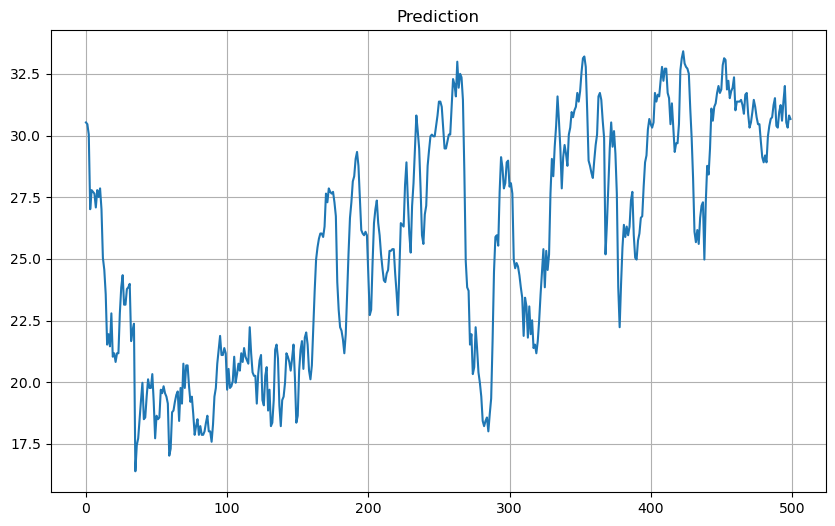

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(x_train.index, x_train)
plt.title(f'Prediction')
plt.grid()
plt.show()

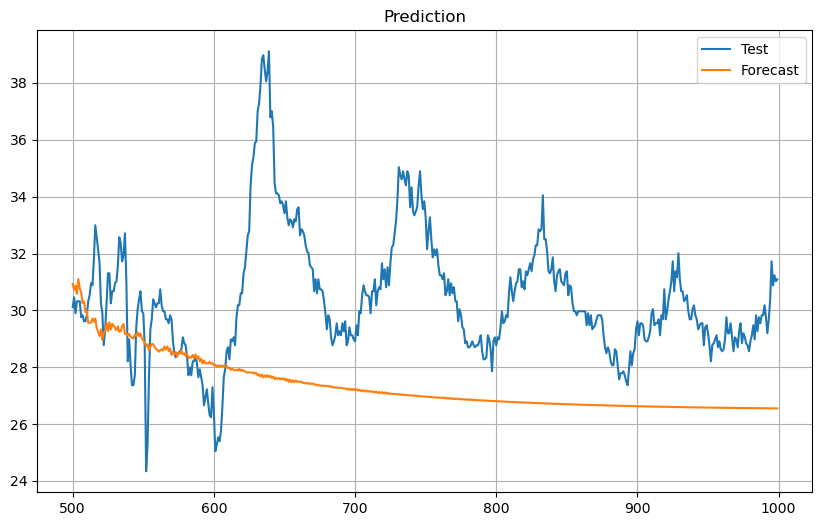

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(x_test.index, x_test, label='Test')
plt.plot(x_test.index, predictions[-1], label='Forecast')
plt.title(f'Prediction')
plt.grid()
plt.legend()
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

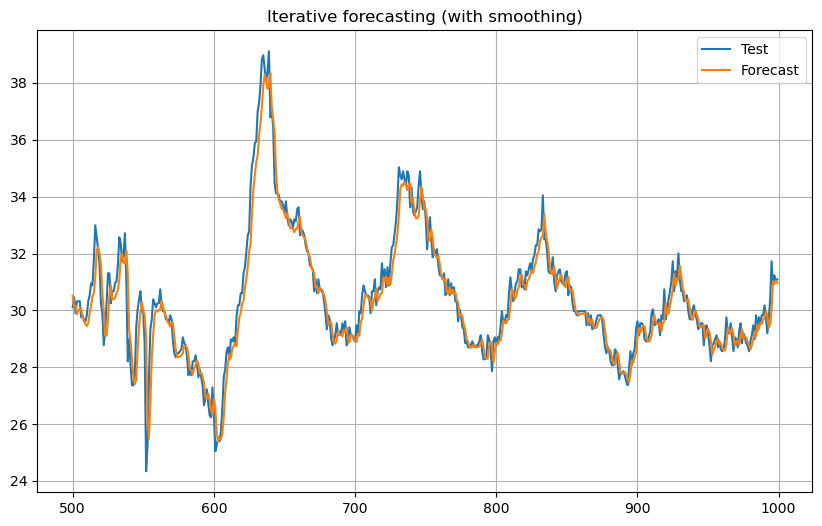

In [ ]:
# Выполнить итеративное предсказание, данные для каждого следующего предсказания обновлять по методу
# "экспоненциальное среднее".

alpha = 0.5 #  коэффициент экспоненциального сглаживания
smoothed_data = x_train.copy()

iterative_predictions = []

# одиночное прогнозирование + сглаживание
for i in range(len(x_test)):
    #print(i)
    model = ARIMA(smoothed_data, order=(3, 0, 0)).fit() 
    next_pred = model.forecast().iloc[0]
    iterative_predictions.append(next_pred)

    actual = x_test.iloc[i]
    smoothed_data = pd.concat([smoothed_data, pd.Series([alpha * actual + (1 - alpha) * next_pred])], ignore_index=True)



iterative_mse = mean_squared_error(x_test, iterative_predictions)
print(f'Итеративное MSE с экспоненциальным средним: {iterative_mse:.5f}')

plt.figure(figsize=(10, 6))
plt.plot(x_test.index, x_test, label='Test')
plt.plot(x_test.index, iterative_predictions, label='Forecast')
plt.title(f'Iterative forecasting (with smoothing)')
plt.grid()
plt.legend()
plt.show()